# Author analysis


In [257]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [12, 6]

DATA_FOLDER = "../data/"

%load_ext blackcellmagic

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [258]:
articles = pd.read_json(DATA_FOLDER + "filtered.jsonl", lines=True)

In [259]:
articles.head(10)

,date,fulltext,id,pages,title,type
0,1900-10-15,CONFÉDÉRATION S 01 SSE Militaire. — Le départe...,GDL-1900-10-15-a-i0014,[2],CONFÉDÉRATION S01SSE,ar
1,1900-02-03,CONFÉDÉRATION SOISSE Nominations. — Le Conseil...,GDL-1900-02-03-a-i0013,[2],CONFÉDÉRATION SOISSE,ar
2,1900-08-06,CONFÉDÉRATION SUISSE Drainage des écus. — D'ap...,GDL-1900-08-06-a-i0014,[2],CONFÉDÉRATION SUISSE,ar
3,1900-02-15,"Le drainage des éens. Genève, 14 février. Lund...",GDL-1900-02-15-a-i0006,[1],Le drainage des éens.,ar
4,1900-06-11,CONFÉDÉRATION SOISS Sonnerie de cloches. — Le ...,GDL-1900-06-11-a-i0015,[2],CONFÉDÉRATION SOISS,ar
5,1900-05-25,CONFÉDÉRATION SUISSE Expulsions. — Le Conseil ...,GDL-1900-05-25-a-i0010,[2],CONFÉDÉRATION SUISSE,ar
6,1900-05-26,"BULLETIN POLITIQUE Lausanne, 26 mai 1900. lie ...",GDL-1900-05-26-a-i0002,[1],BULLETIN POLITIQUE,ar
7,1900-09-08,KOUVELiES DES CANTONS BERNE. — L'institut vacc...,GDL-1900-09-08-a-i0016,[2],KOUVELiES DES CANTONS,ar
8,1900-11-22,CONFÉDÉRATION SUISSE Budget. — La commission d...,GDL-1900-11-22-a-i0013,[2],CONFÉDÉRATION SUISSE,ar
9,1900-11-24,CONFÉDÉRATION SUISSE Chemins de fer. — Le Cons...,GDL-1900-11-24-a-i0015,[2],CONFÉDÉRATION SUISSE Chemins de fer. — Le Cons...,ar


In [260]:
len(articles)

34582

In [261]:
jdg_indexes = articles.id.str.contains("JDG")
gdl_indexes = articles.id.str.contains("GDL")

print(
    "JDG: ",
    jdg_indexes.sum(),
    "\nGDL: ",
    gdl_indexes.sum()
)

JDG:  13487 
GDL:  21095


In [262]:
banking_indexes =  articles.fulltext.str.lower().str.contains("secret bancaire")
banking_indexes.sum()

1737

## Different types of authors

#### Agencies

- **ATS** Agence télégraphique suisse
- **AFP** Agence France-Presse
- **Reuters** 
- **AP**: Associated press

In [263]:
def agency_indexes(agency_pattern):
    return articles.fulltext.str.lower().str.contains(agency_pattern)

ats_indexes = agency_indexes(r"\(a\.?t\.?s\.?\)")
ap_indexes = agency_indexes(r"\((a\.?p\.?|associated press\.?)\)")
afp_indexes = agency_indexes(r"\(a\.?f\.?p\.?\)")
reuter_indexes = agency_indexes(r"\(reuters?\.?\)")

agency_indexes = ats_indexes | ap_indexes | afp_indexes | reuter_indexes
agency_indexes.sum()


/Users/yann/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


6355

In [59]:
(banking_indexes & agency_indexes).sum() / banking_indexes.sum()

0.2867012089810017

In [60]:
agency_indexes.sum() / articles.shape[0]

0.18376612110346424

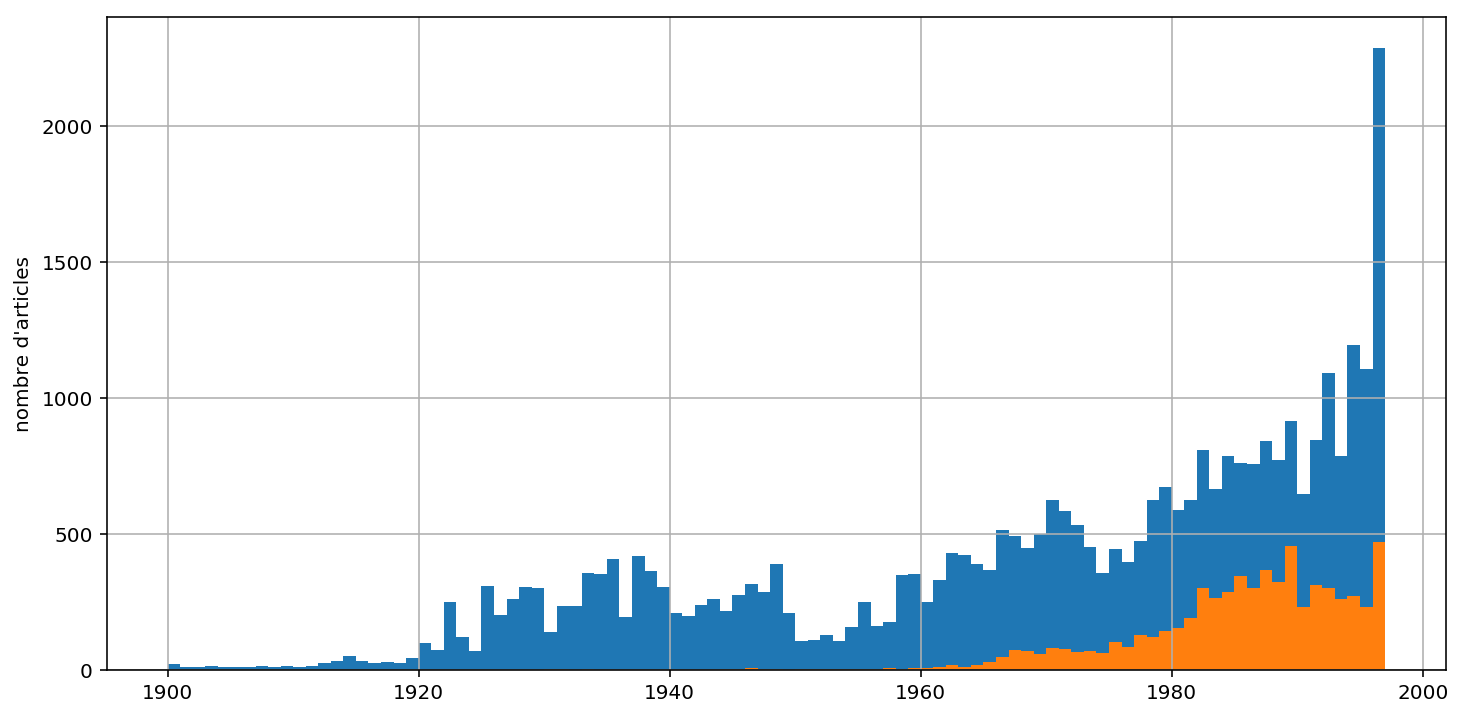

In [264]:
def year_series(series):
    year_series = series.date.dt.year
    delta_years = year_series.max() - year_series.min() 
    plt.ylabel("nombre d'articles")
    return year_series, delta_years
    

def year_hist(series):
    years, bins = year_series(series)
    return years.hist(bins=bins)

year_hist(articles)
year_hist(articles[agency_indexes]);

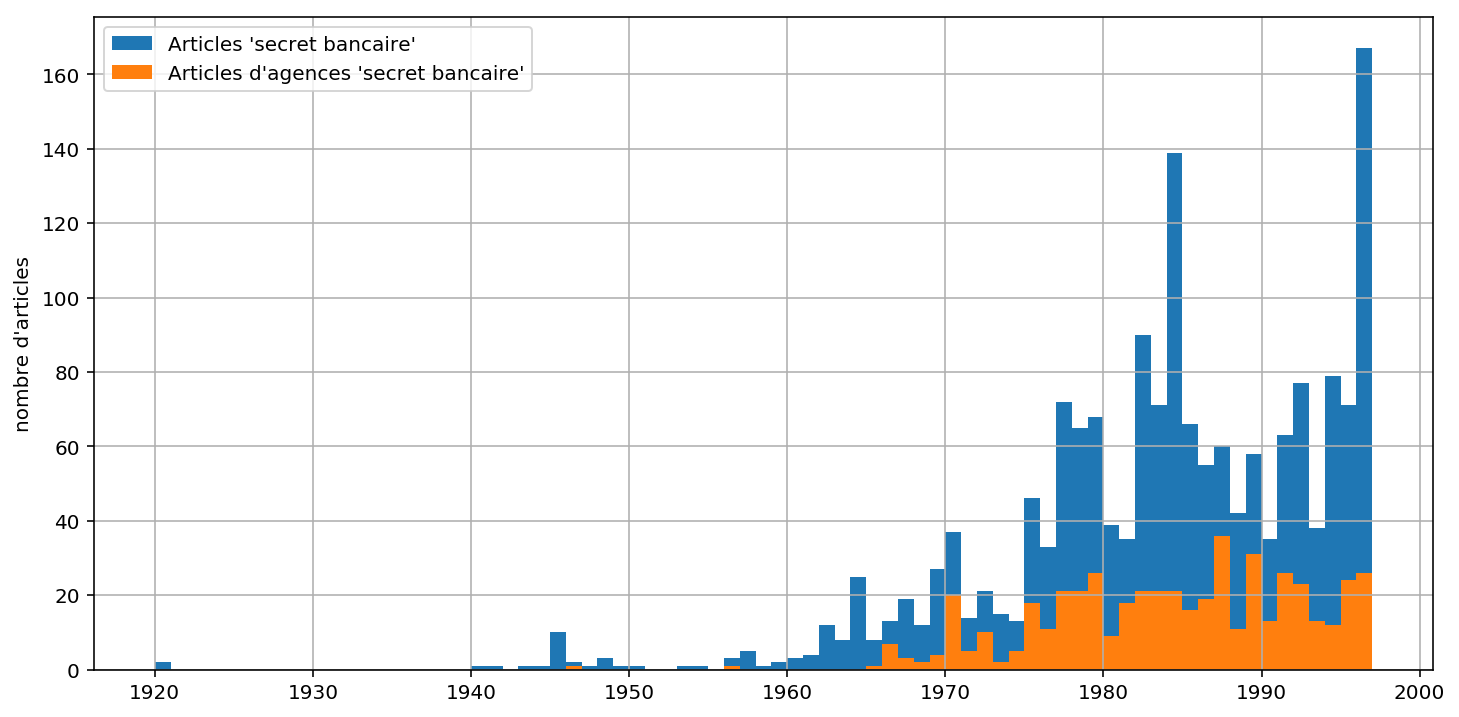

In [265]:
year_hist(articles[banking_indexes])
year_hist(articles[banking_indexes & agency_indexes]);

plt.legend([
    "Articles 'secret bancaire'", 
    "Articles d'agences 'secret bancaire'"
]);
plt.savefig("../rapport/analysis/angency_banking_hist.png", dpi=200);

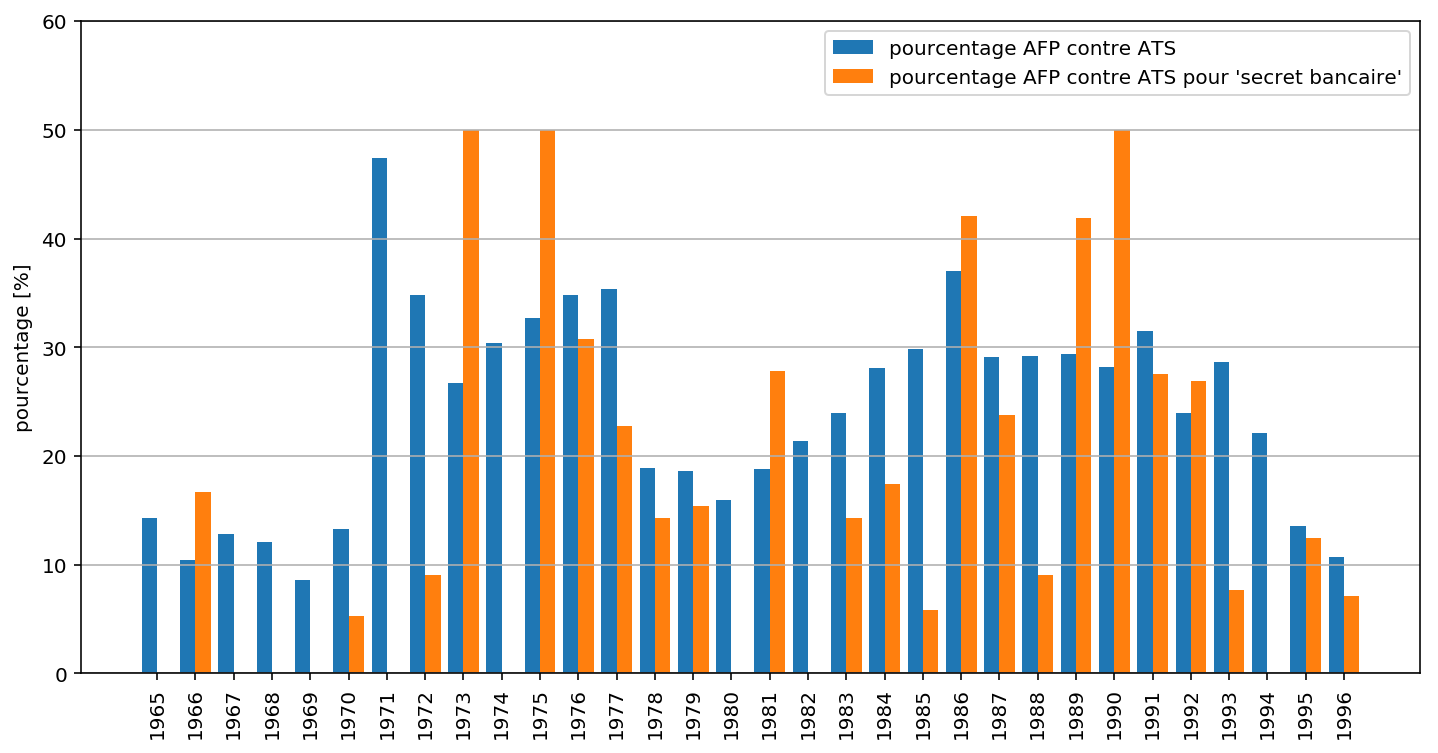

In [269]:
years = range(1965, 1998)

ats, _ = year_series(articles[ats_indexes])
afp, _ = year_series(articles[afp_indexes])

ats_hist, bins = np.histogram(ats, bins=years)
afp_hist, _ = np.histogram(afp, bins=bins)

bar_width = 0.4

plt.bar(
    np.array(years[:-1]) - bar_width / 2,
    100.0 * afp_hist / (ats_hist + afp_hist),
    width=bar_width,
    label="pourcentage AFP contre ATS",
)

ats, _ = year_series(articles[ats_indexes & banking_indexes])
afp, _ = year_series(articles[afp_indexes & banking_indexes])

ats_hist, _ = np.histogram(ats, bins=years)
afp_hist, _ = np.histogram(afp, bins=years)

plt.bar(
    np.array(years[:-1]) + bar_width / 2,
    100.0 * afp_hist / (ats_hist + afp_hist),
    width=bar_width,
    label="pourcentage AFP contre ATS pour 'secret bancaire'",
)

plt.legend()

plt.ylim(0, 60)
plt.ylabel("pourcentage [%]")
plt.grid(axis='y')

plt.xticks(years[:-1], rotation=90)
plt.savefig("../rapport/analysis/afp_ats_percentage.png", dpi=200);

#### Authors

In [11]:
fulltext = articles[articles.id.str.contains("JDG-1987-08-13")].iloc[0].fulltext
fulltext

'MARCHÉ DES CAPITAUX Syndicats d\'émissions : les grandes banques libéralisent ,.\'-il. : L\'. ,.... „, ; ,. : .,, (. 1 \'" Les trois grandes banques suisses ont annonce mercredi qu\'elles s\'apprêtaient à ouvrir sous certaines conditions, leur syndicat d\'émission d\'emprunts sur le marché suisse des capitaux, à des émissions dirigées par des banques étrangères établies en Suisse. Des détails sur cène mesure de libéralisation, qui répond à l\'internationalisation croissante du marché des capitaux, seront gués ultérieurement, ont annoncé les trois grandes banques (UBS, Crédit Suisse et SBS) dans un communiqué. J .-L. L. '

In [12]:
initials_pattern = r"\w{2,}\s*\.\s*((\s*\-?\w\s*\.\s*){2,4})$"
re.search(initials_pattern, fulltext)

<_sre.SRE_Match object; span=(596, 618), match='communiqué. J .-L. L. '>

In [13]:
initials_matches = (
    articles.fulltext.str.extract(initials_pattern)
    .dropna()[0]
    .apply(lambda s: s.upper().replace(" ", ""))
)

In [14]:
initials_indexes = articles.index.isin(initials_matches.index)
len(initials_matches)

913

In [16]:
initials_counts = (
    pd.DataFrame(
        {
            "total": initials_matches.value_counts(),
            "JDG": initials_matches[jdg_indexes].value_counts(),
            "GDL": initials_matches[gdl_indexes].value_counts(),
        }
    )
    .sort_values("total", ascending=False)
    .fillna(0)
    .astype(int)
)


initials_counts.head(10)

,total,JDG,GDL
J.-L.L.,154,75,79
F.L.,135,1,134
J.R.,34,16,18
G.R.,30,0,30
S.A.,28,21,7
H.V.,24,24,0
A.K.,23,23,0
J.-S.E.,19,12,7
A.V.,19,12,7
M.-J.K.,18,9,9


In [17]:
initials_counts.sort_values("GDL", ascending=False).head()

,total,JDG,GDL
F.L.,135,1,134
J.-L.L.,154,75,79
G.R.,30,0,30
J.R.,34,16,18
F.W.,11,0,11


In [18]:
initials_counts.sort_values("JDG", ascending=False).head()

,total,JDG,GDL
J.-L.L.,154,75,79
H.V.,24,24,0
A.K.,23,23,0
S.A.,28,21,7
J.R.,34,16,18


In [273]:
frequent_initials = initials_counts.head(12).index

In [274]:
(initials_indexes & agency_indexes).sum()

21

In [275]:
with open(DATA_FOLDER + "authors_jdg.txt", "r") as f:
    authors_jdg_list = f.read()

# a map from initials to the set of authors with thos initials
authors_jdg = {}
for author in authors_jdg_list.split("\n"):
    initials = ""
    for name_part in author.split(" "):
        if "-" in name_part:
            single_name = name_part.split("-")
            initials += single_name[0][:1] + ".-" + single_name[1][:1] + "."
        else:
            initials += name_part[:1] + "."

    if len(initials) > 1:
        if initials in authors_jdg:
            authors_jdg[initials].add(author)
        else:
            authors_jdg[initials] = set([author])


for initials in frequent_initials:
    if initials in authors_jdg:
        print(authors_jdg[initials])
    else:
        print(initials)

{'Jean-Luc Lederrey'}
F.L.
{'Jean Roussel'}
G.R.
{'Sylvie Arsever'}
{'Henri Villy'}
{'André Klopmann'}
{'Jacques-Simon Eggly'}
{'André Vallana', 'Anton Vos'}
M.-J.K.
{'Pierre Novello'}
V.S.


#### Author's full name

In [22]:
from functools import reduce

authors_jdg_set = reduce(lambda s1, s2: s1 | s2, authors_jdg.values())
jdg_pattern = "(" + "|".join(authors_jdg_set) + ")"

full_name = (
    articles.fulltext.str.extract(jdg_pattern, flags=re.IGNORECASE)[0]
    .dropna()
    .str.lower()
    .str.strip()
)

1772
2670


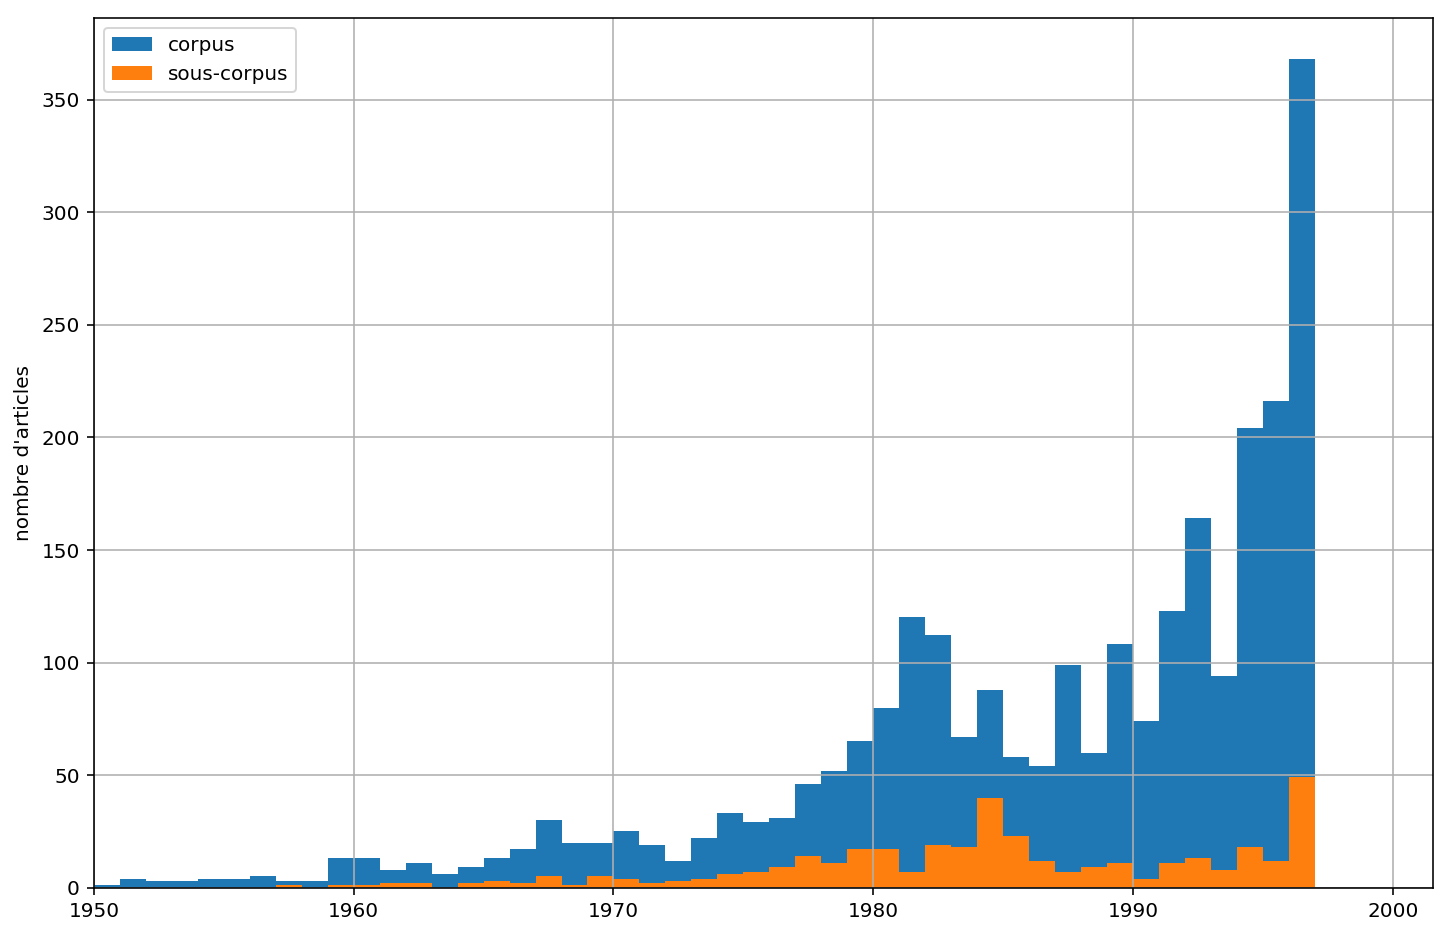

In [222]:
full_name_indexes = articles.index.isin(full_name.index)
print(full_name_indexes.sum())

attributed_indexes = full_name_indexes | initials_indexes
print(attributed_indexes.sum())

year_hist(articles[attributed_indexes]);
year_hist(articles[attributed_indexes & banking_indexes]);

plt.axis(xmin=1950);
plt.ylabel("nombre d'articles")
plt.legend(["corpus", "sous-corpus"]);

plt.savefig("../rapport/methodology/author_attributed.png", dpi=200)

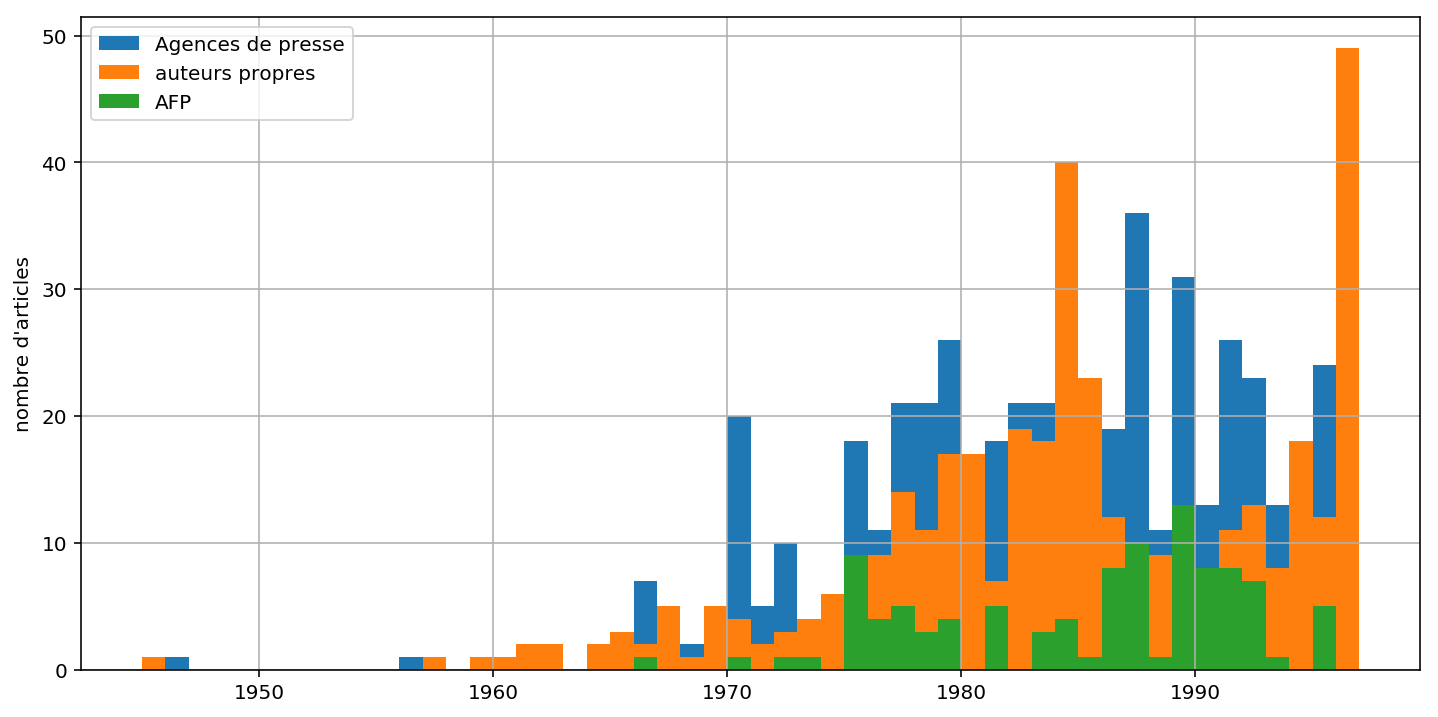

In [272]:
year_hist(articles[agency_indexes & banking_indexes]);
year_hist(articles[attributed_indexes & banking_indexes]);
year_hist(articles[afp_indexes & banking_indexes]);

plt.legend(["Agences de presse", "auteurs propres", "AFP"]);
plt.savefig("../rapport/analysis/authors_agency_count.png", dpi=200);

In [24]:
full_name.value_counts()

jean-luc lederrey       510
pierre novello          190
jacques-simon eggly     156
andré vallana           144
marian stepczynski      134
sylvie arsever           89
françoise buffat         59
christian campiche       37
pascal garcin            27
ignace jeannerat         27
mehmet gultas            27
esther mamarbachi        25
françoise blaser         25
robin bleeker            22
bernard wuthrich         22
denise jeanmonod         20
jasmine audemars         17
olivier reverdin         17
michel petitpierre       13
antoine maurice          12
roger de diesbach        10
roland ecoffey           10
jean-claude buffle        9
antoine bosshard          9
luis lema                 9
patricia briel            9
fati mansour              9
jean roussel              8
françoise weilhammer      7
bernard béguin            7
                       ... 
philippa de roten         5
sylvain besson            5
andré klopmann            5
alain r. walon            5
thierry mertenat    

In [25]:
full_name[gdl_indexes & banking_indexes & (articles.date.dt.year <= 1990)].value_counts()

jean-luc lederrey      29
jacques-simon eggly    26
françoise blaser        6
sylvie arsever          4
pierre novello          4
isabelle martin         2
pascal garcin           1
jean-claude poulin      1
paul ladame             1
jasmine audemars        1
olivier reverdin        1
françoise buffat        1
nuno sepulveda          1
Name: 0, dtype: int64

In [26]:
initials_matches[gdl_indexes & banking_indexes & (articles.date.dt.year <= 1990)].value_counts()

J.-L.L.    16
D.-S.M.     6
J.R.        5
H.S.        3
A.-M.L.     3
S.A.        2
J.-S.E.     2
G.P.        2
F.W.        2
R.L.        1
X.P.        1
M.S.        1
J.A.        1
-E.R.       1
C.-E.L.     1
R.R.        1
F.L.        1
J.-P.G.     1
J.-C.R.     1
A.W.        1
J.S.E.      1
M.-J.K.     1
G.D.        1
-H.P.       1
D.A.        1
J.S.        1
P.-A.S.     1
Name: 0, dtype: int64

#### Rédaction

In [211]:
red_indexes = articles.fulltext.str.contains("\([R|r][é|e]d\.?\)")
red_indexes.sum()

261

In [212]:
(red_indexes & (ats_indexes | afp_indexes | initials_indexes)).sum()

105

--> too much overlap! Don't use.